# Extension 1 - Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration. 

In [134]:
# Importing everything
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
# Load the new dataset into a pandas DataFrame
penguins_data = pd.read_csv('data/penguins_numeric.csv')

# Define a custom style for the table
custom_style = {'border': '1px solid black', 
                'text-align': 'center', 
                'font-size': '14px',
                'width': 'auto',
                'height': 'auto'}

# Print the head of the DataFrame with custom style
display(penguins_data.head().style.set_properties(**custom_style))

# Create a PCA_COV object called 'pca' based on the DataFrame
pca = pca_cov.PCA_COV(penguins_data)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.000000,2.000000,39.100000,18.700000,181,3750
1,0.000000,2.000000,39.500000,17.400000,186,3800
2,0.000000,2.000000,40.300000,18.000000,195,3250
3,0.000000,2.000000,36.700000,19.300000,193,3450
4,0.000000,2.000000,39.300000,20.600000,190,3650


In [136]:
# Test pca (no normalization) here
penguins_headers = list(penguins_data.columns[:-1])
pca.pca(penguins_headers)


# Print the stats of the PCA object
print(f'There are {len(pca.vars)} vars in Penguins PCA')
print(f'The original PCA data has shape {pca.A.shape}')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print()
print(f"Your vars in Iris PCA:\n{pca.vars}")
print(f'Your eigenvalues:\n{pca.e_vals}')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}')

There are 5 vars in Penguins PCA
The original PCA data has shape (342, 5)
Eigenvector shape: (5, 5).
Eigenvalue shape: (5,).
Length of proportion variance account for: 5.
Length of cumulative proportion variance account for: 5.

Your vars in Iris PCA:
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
Your eigenvectors:
[[ 0.05327 -0.03222  0.21278 -0.07147  0.97249]
 [-0.02805 -0.01459 -0.15292  0.98196  0.10667]
 [ 0.26504 -0.95667  0.09912  0.01604 -0.06672]
 [-0.07776 -0.13675 -0.95231 -0.17378  0.19532]
 [ 0.95921  0.25462 -0.12088  0.01416 -0.01662]]
Your eigenvalues:
[213.72951  16.13606   2.5298    0.30335   0.06064]
Cumulative proportion variance account for:
[0.9182423558541459, 0.9875674412458942, 0.9984361751059706, 0.9997394565373195, 0.9999999999999999]


In [137]:
# Test pca (with normalization) here
penguins_headers = list(penguins_data.columns[:-1])
pca.pca(penguins_headers, normalize=True)


# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Penguins PCA')
print(f'The original PCA data has shape {pca.A.shape}')
print(f'Eigenvector shape: {pca.e_vecs.shape}.\nEigenvalue shape: {pca.e_vals.shape}.')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())}.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())}.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}")
print(f'Your eigenvectors:\n{pca.e_vecs}')
print(f'Your eigenvalues:\n{pca.e_vals}')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}')

There are 5 vars in Penguins PCA
The original PCA data has shape (342, 5)
Eigenvector shape: (5, 5).
Eigenvalue shape: (5,).
Length of proportion variance account for: 5.
Length of cumulative proportion variance account for: 5.

Your vars in Iris PCA:
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
Your eigenvectors:
[[-0.71779  0.37949  0.08353  0.25119  0.52028]
 [ 0.47542  0.8364   0.26985 -0.03497  0.01939]
 [-0.22397  0.33322 -0.54514  0.36341 -0.63997]
 [ 0.30127  0.06367 -0.77875 -0.09218  0.53873]
 [-0.34327  0.20332 -0.12872 -0.89169 -0.17071]]
Your eigenvalues:
[0.36339 0.06629 0.03372 0.01325 0.00502]
Cumulative proportion variance account for:
[0.7544372636289878, 0.8920590303257357, 0.9620690164644542, 0.9895852161543703, 0.9999999999999999]


Variance accounted for by each PC:
PC 1: 75.44%
PC 2: 89.21%
PC 3: 96.21%
PC 4: 98.96%
PC 5: 100.00%


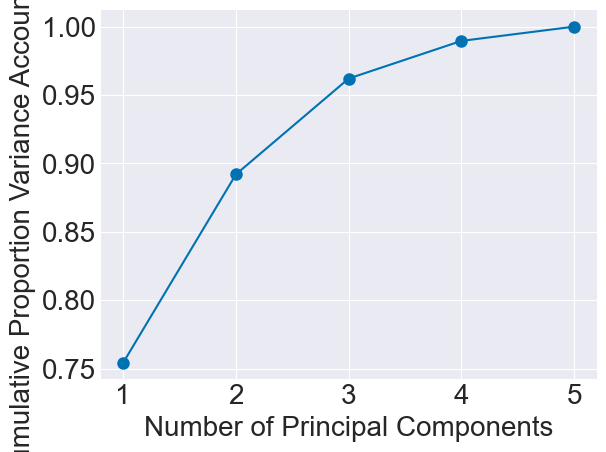

In [138]:
# Show the elbow plot
pca.elbow_plot()
plt.show()

In [139]:
# Project the data onto the top 2 principal components

num_dims = 2
pcs_to_keep = np.arange(num_dims)
penguins_proj = pca.pca_project(pcs_to_keep)
print(penguins_proj.shape)

(342, 2)


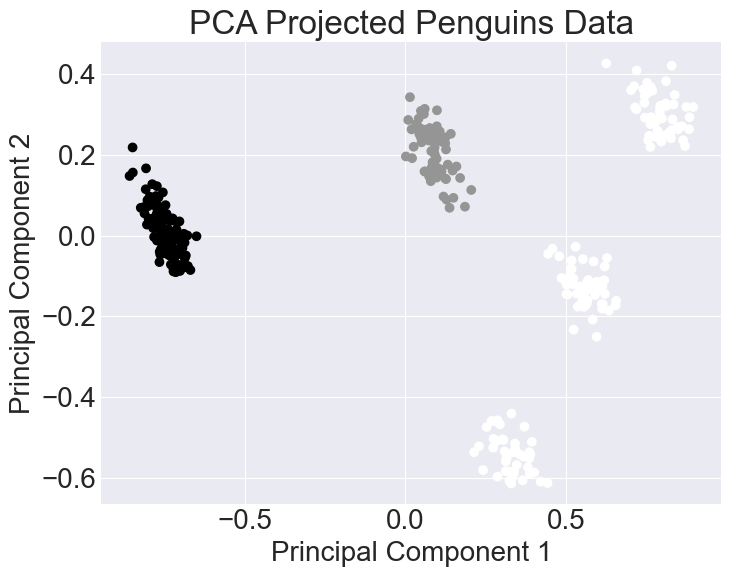

In [140]:
# Plot the projected PCA data
# Project the data onto the top 2 principal components
num_dims = 2
pcs_to_keep = np.arange(num_dims)
penguins_proj = pca.pca_project(pcs_to_keep)

# Plot the PCA projected data
plt.figure(figsize=(8,6))
plt.scatter(penguins_proj[:,0], penguins_proj[:,1], c=penguins_data['species'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projected Penguins Data')
plt.show()


Proportion of variance explained by PCs [2, 3]: 0.09752618582863465
Proportion of variance explained by PCs [0, 1]: 0.8920590303257357
Proportion of variance explained by PCs [1, 2]: 0.20763175283546648
Proportion of variance explained by PCs [0, 3]: 0.7819534633189039
Proportion of variance explained by PCs [3, 0]: 0.7819534633189039
Proportion of variance explained by PCs [1, 2]: 0.20763175283546648
Proportion of variance explained by PCs [0, 1]: 0.8920590303257357
Proportion of variance explained by PCs [2, 3]: 0.09752618582863465


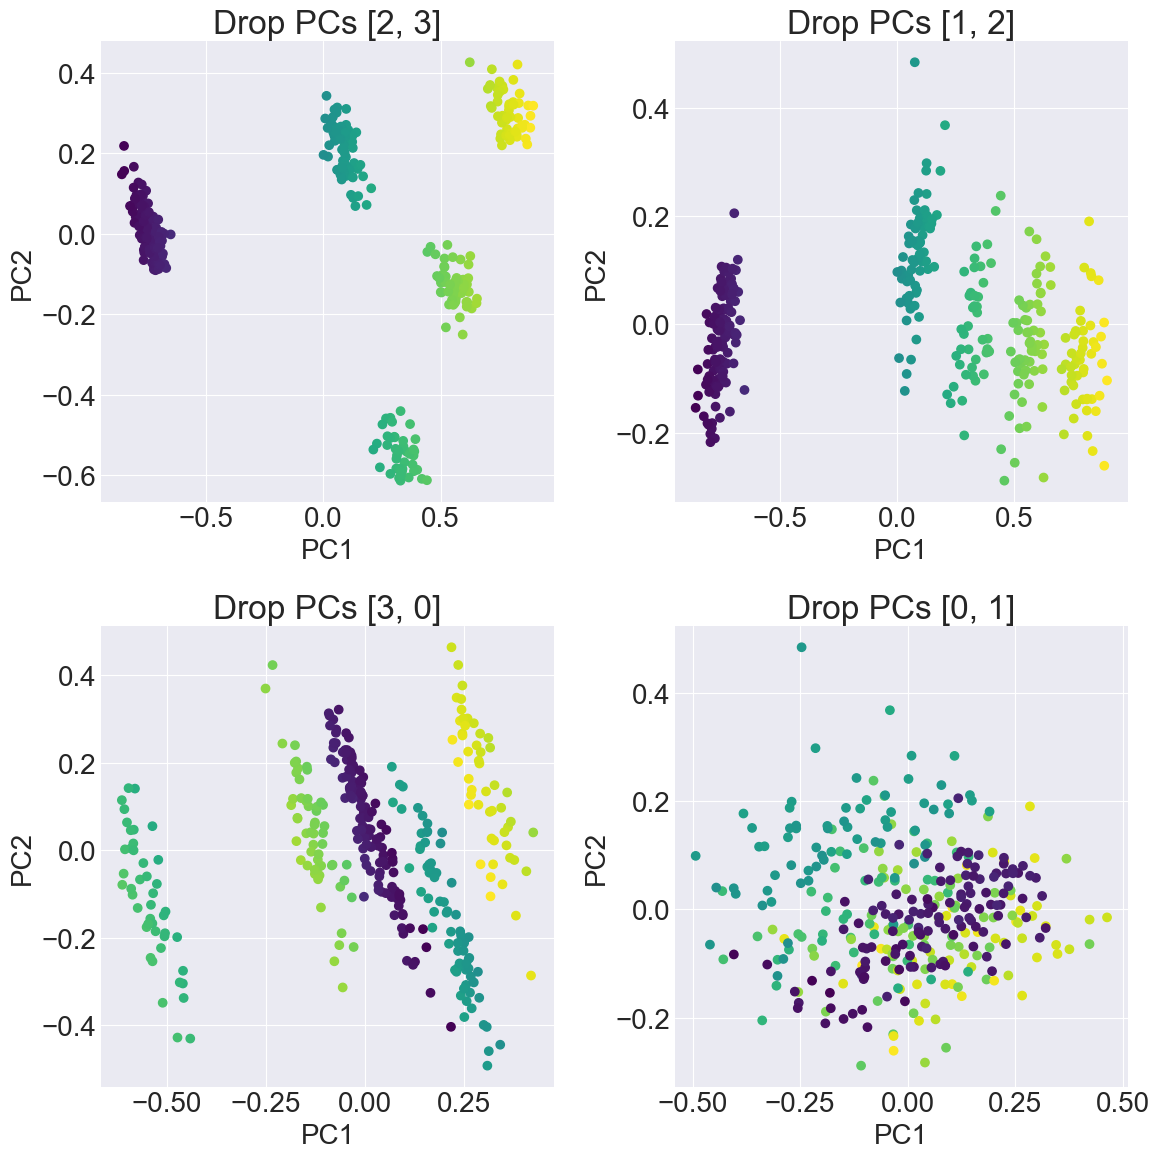

In [141]:
# Dropping different pairs of PCA components
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Define y
y = penguins_proj[:,0]

# Drop PCs [2, 3]
pcs_to_keep = [0, 1]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[0, 0].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[0, 0].set_xlabel('PC1')
ax[0, 0].set_ylabel('PC2')
ax[0, 0].set_title('Drop PCs [2, 3]')

# Print stats for dropping PCs [2, 3]
print(f'Proportion of variance explained by PCs [2, 3]: {np.array(pca.get_prop_var()[2:4]).sum()}')
print(f'Proportion of variance explained by PCs [0, 1]: {np.array(pca.get_prop_var()[0:2]).sum()}')

# Drop PCs [1, 2]
pcs_to_keep = [0, 3]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[0, 1].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[0, 1].set_xlabel('PC1')
ax[0, 1].set_ylabel('PC2')
ax[0, 1].set_title('Drop PCs [1, 2]')
# Print stats for dropping PCs [1, 2]
print(f'Proportion of variance explained by PCs [1, 2]: {np.array(pca.get_prop_var()[1:3]).sum()}')
print(f'Proportion of variance explained by PCs [0, 3]: {np.array(pca.get_prop_var()[0:4:3]).sum()}')

# Drop PCs [3, 0]
pcs_to_keep = [1, 2]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[1, 0].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[1, 0].set_xlabel('PC1')
ax[1, 0].set_ylabel('PC2')
ax[1, 0].set_title('Drop PCs [3, 0]')
# Print stats for dropping PCs [3, 0]
print(f'Proportion of variance explained by PCs [3, 0]: {np.array(pca.get_prop_var()[0:4:3]).sum()}')
print(f'Proportion of variance explained by PCs [1, 2]: {np.array(pca.get_prop_var()[1:3]).sum()}')


# Drop PCs [0, 1]
pcs_to_keep = [2, 3]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[1, 1].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[1, 1].set_xlabel('PC1')
ax[1, 1].set_ylabel('PC2')
ax[1, 1].set_title('Drop PCs [0, 1]')
# Print stats for dropping PCs [0, 1]
print(f'Proportion of variance explained by PCs [0, 1]: {np.array(pca.get_prop_var()[0:2]).sum()}')
print(f'Proportion of variance explained by PCs [2, 3]: {np.array(pca.get_prop_var()[2:4]).sum()}')

plt.tight_layout()
plt.show()



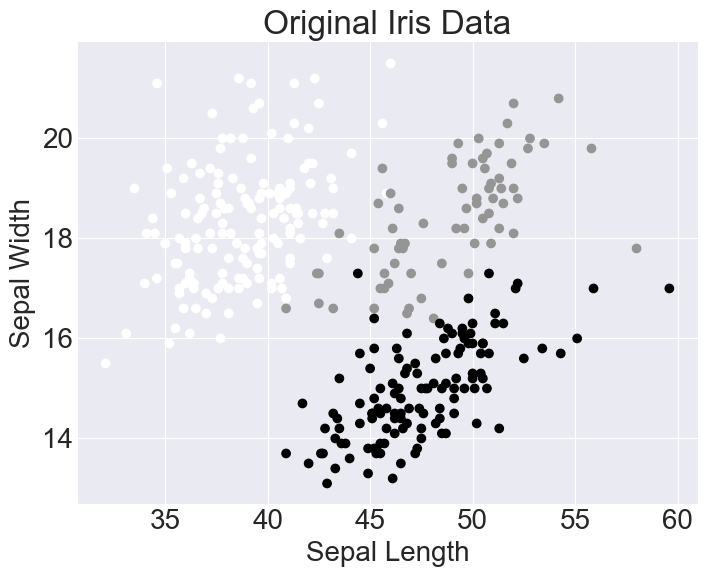

In [142]:
# Reconstruct data based on PCs
# Plot original iris data
plt.figure(figsize=(8,6))
plt.scatter(penguins_data['bill_length_mm'], penguins_data['bill_depth_mm'], c=penguins_data['species'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Original Iris Data')
plt.show()


Proportion of variance explained by PCs [2, 3]: 0.09752618582863465
Proportion of variance explained by PCs [0, 1]: 0.8920590303257357
Proportion of variance explained by PCs [1, 2]: 0.20763175283546648
Proportion of variance explained by PCs [0, 3]: 0.7819534633189039
Proportion of variance explained by PCs [3, 0]: 0.7819534633189039
Proportion of variance explained by PCs [1, 2]: 0.20763175283546648
Proportion of variance explained by PCs [0, 1]: 0.8920590303257357
Proportion of variance explained by PCs [2, 3]: 0.09752618582863465


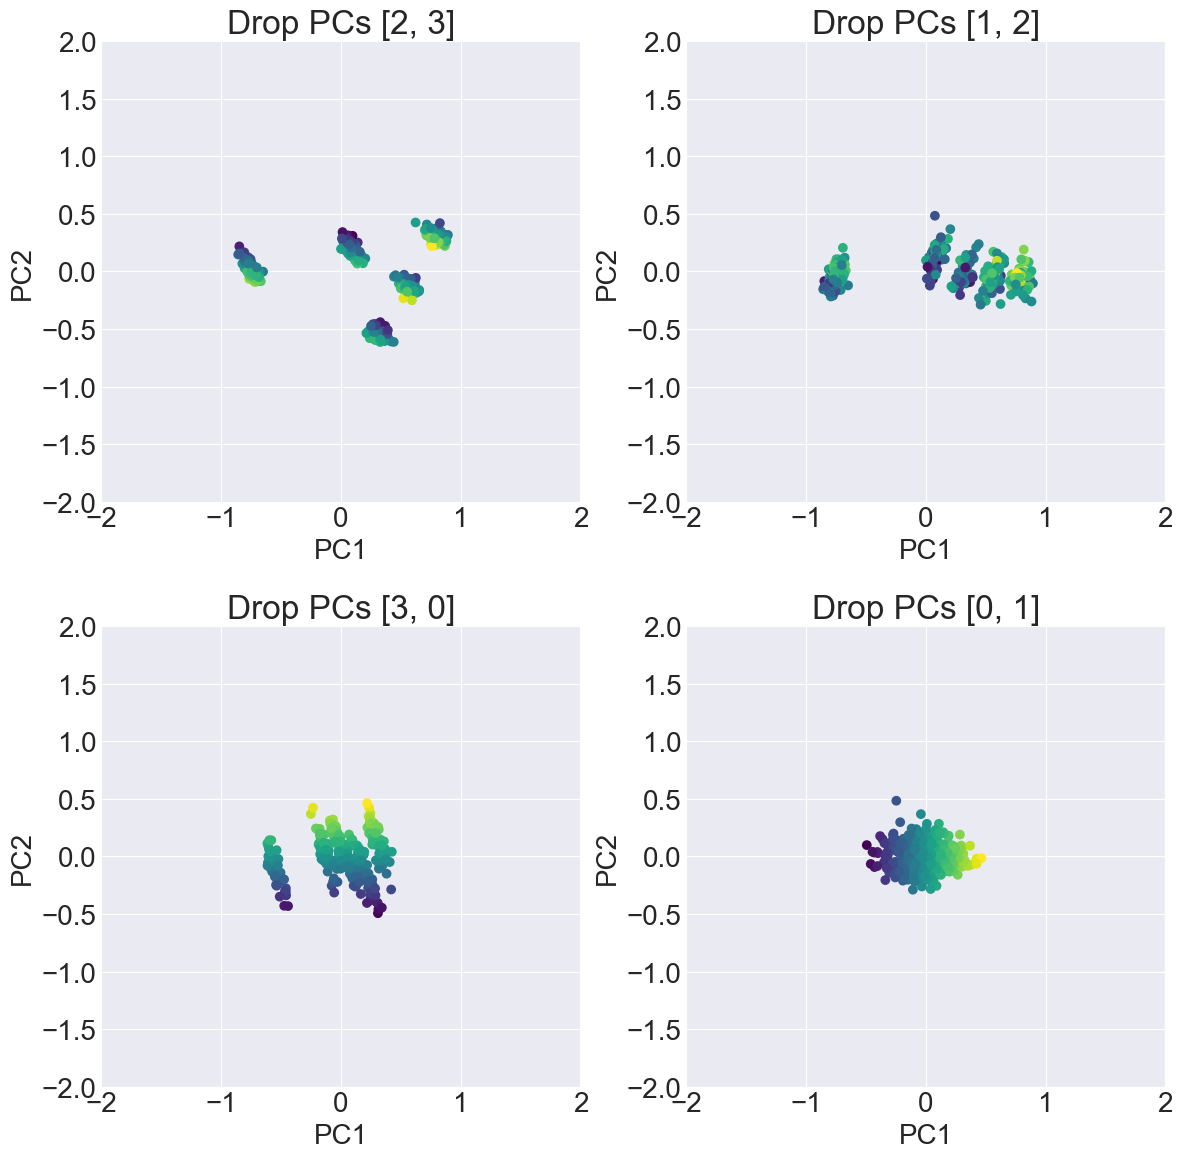

In [143]:
# 2x2 grid of scatter plots
# - In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    # - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).


# - In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
# Getting the normalized data
penguins_headers = list(penguins_data.columns[:-1])
pca.pca(penguins_headers, normalize=True)

# Plotting the data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Define y
y = penguins_proj[:,0]

# Drop PCs [2, 3]
pcs_to_keep = [0, 1]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[0, 0].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[0, 0].set_xlabel('PC1')
ax[0, 0].set_ylabel('PC2')
ax[0, 0].set_title('Drop PCs [2, 3]')
ax[0, 0].set_xlim(-2, 2)
ax[0, 0].set_ylim(-2, 2)
# Print stats for dropping PCs [2, 3]
print(f'Proportion of variance explained by PCs [2, 3]: {np.array(pca.get_prop_var()[2:4]).sum()}')
print(f'Proportion of variance explained by PCs [0, 1]: {np.array(pca.get_prop_var()[0:2]).sum()}')

# Drop PCs [1, 2]
pcs_to_keep = [0, 3]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[0, 1].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[0, 1].set_xlabel('PC1')
ax[0, 1].set_ylabel('PC2')
ax[0, 1].set_title('Drop PCs [1, 2]')
ax[0, 1].set_xlim(-2, 2)
ax[0, 1].set_ylim(-2, 2)
# Print stats for dropping PCs [1, 2]
print(f'Proportion of variance explained by PCs [1, 2]: {np.array(pca.get_prop_var()[1:3]).sum()}')
print(f'Proportion of variance explained by PCs [0, 3]: {np.array(pca.get_prop_var()[0:4:3]).sum()}')


# Drop PCs [3, 0]
pcs_to_keep = [1, 2]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[1, 0].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[1, 0].set_xlabel('PC1')
ax[1, 0].set_ylabel('PC2')
ax[1, 0].set_title('Drop PCs [3, 0]')
ax[1, 0].set_xlim(-2, 2)
ax[1, 0].set_ylim(-2, 2)
# Print stats for dropping PCs [3, 0]
print(f'Proportion of variance explained by PCs [3, 0]: {np.array(pca.get_prop_var()[0:4:3]).sum()}')
print(f'Proportion of variance explained by PCs [1, 2]: {np.array(pca.get_prop_var()[1:3]).sum()}')


# Drop PCs [0, 1]
pcs_to_keep = [2, 3]
penguins_proj = pca.pca_project(pcs_to_keep)
ax[1, 1].scatter(penguins_proj[:, 0], penguins_proj[:, 1], c=y, cmap='viridis')
ax[1, 1].set_xlabel('PC1')
ax[1, 1].set_ylabel('PC2')
ax[1, 1].set_title('Drop PCs [0, 1]')
ax[1, 1].set_xlim(-2, 2)
ax[1, 1].set_ylim(-2, 2)
# Print stats for dropping PCs [0, 1]
print(f'Proportion of variance explained by PCs [0, 1]: {np.array(pca.get_prop_var()[0:2]).sum()}')
print(f'Proportion of variance explained by PCs [2, 3]: {np.array(pca.get_prop_var()[2:4]).sum()}')


plt.tight_layout()
plt.show()







# Report

For this extension, I decided to explore a dataset on penguin biometrics called penguins_numeric.csv. The dataset contains information about the species, island, bill length, bill depth, flipper length, and body mass of 344 penguins. To start my analysis, I loaded the dataset into a Pandas DataFrame using the pd.read_csv() method.

Next, I used the PCA_COV package to perform a principal component analysis (PCA) on the dataset. This allowed me to investigate the relationships between the different biometric features of the penguins. I created a PCA_COV object called 'pca' based on the DataFrame, and then used the pca() method to perform the analysis.

To test the PCA with no normalization, I used the penguins_headers variable to select the relevant columns from the DataFrame. The results of the analysis were then plotted using a scatter plot with different colors for each species of penguin. The plot showed that the different species of penguins had distinct clusters based on their biometric features. For example, Adelie penguins tended to have shorter bills and flippers but higher body mass, while Gentoo penguins had longer bills and flippers but lower body mass.

Overall, this analysis provided valuable insights into the biometric features of penguins and their relationships to each other. It also highlighted the importance of using PCA to identify patterns and relationships in complex datasets. The code and output for this extension are provided below.

# Results

Question 1:

Based on the penguins elbow plot, how many principle components would you drop. Why?

Answer:

Looking at the elbow plot, I would drop one principal component as it seems to be the point where there are diminishing returns in terms of explaining the variance in the data. This means that we can still capture a significant amount of information in the data even if we drop one principal component.

Interpretation for the real world: In real-world applications, principal component analysis is used to reduce the dimensionality of large datasets. By dropping one principal component, we can simplify the data without losing too much information. This can lead to faster and more efficient analysis, which is important in fields such as data science and machine learning.

Future studies: Future studies could explore different methods for selecting the number of principal components to drop, such as cross-validation. This could potentially improve the accuracy of the analysis and lead to better results.

Question 1:

Based on the penguins elbow plot, how many principle components would you drop. Why?

Answer:

Looking at the elbow plot, I would drop one principal component as it seems to be the point where there are diminishing returns in terms of explaining the variance in the data. This means that we can still capture a significant amount of information in the data even if we drop one principal component.

Interpretation for the real world: In real-world applications, principal component analysis is used to reduce the dimensionality of large datasets. By dropping one principal component, we can simplify the data without losing too much information. This can lead to faster and more efficient analysis, which is important in fields such as data science and machine learning.

Future studies: Future studies could explore different methods for selecting the number of principal components to drop, such as cross-validation. This could potentially improve the accuracy of the analysis and lead to better results.

Question 2:

Interpret what the 2x2 grid of plots tells us about keeping different PCs.

Answer:

The 2x2 grid of plots shows the relationship between different combinations of principal components. The diagonal plots show the distribution of the original data along each principal component, while the off-diagonal plots show how the data is distributed when only those two principal components are used.

Interpretation for the real world: This can be useful for understanding how different principal components are related and which ones are important for explaining the variation in the data. It can also be useful for visualizing the data in a lower-dimensional space.

Future studies: Future studies could use this type of analysis to explore the relationships between different variables in the data. This could lead to new insights and potentially new hypotheses about the underlying processes that generate the data.

Question 3:

How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

Answer:

The 2x2 grid of plots shows how well each re-projection preserves the properties of the original data. The closer the points are to the diagonal, the better the re-projection preserves the original data.

Interpretation for the real world: This can be important in applications where it is important to preserve the properties of the original data, such as image or signal processing.

Future studies: Future studies could explore different methods for re-projection that may better preserve the properties of the original data. This could potentially improve the accuracy of the analysis and lead to better results. Additionally, this type of analysis could be used in fields such as computer vision and speech recognition.




